In [4]:
from transformers import BertTokenizer
import pandas as pd

df = pd.read_csv('filtered_df_small_ver1106.csv')
df

,Title,Original_Text,Sentence
0,Yes Bonds Could Still Rally Even With Yields B...,Bond Yields Hit Record Lows is a headline tha...,first the 30year bond yield fell past 2% then ...
1,Yes Bonds Could Still Rally Even With Yields B...,Bond Yields Hit Record Lows is a headline tha...,a few market veterans also recall bondmarket r...
2,Yes Bonds Could Still Rally Even With Yields B...,Bond Yields Hit Record Lows is a headline tha...,and even fewer stuck their necks out then to d...
3,Yes Bonds Could Still Rally Even With Yields B...,Bond Yields Hit Record Lows is a headline tha...,today some of these early and prescient bond b...
4,Yes Bonds Could Still Rally Even With Yields B...,Bond Yields Hit Record Lows is a headline tha...,i never bought bonds for yield he said.
...,...,...,...
1007741,Poised to Leave Bankruptcy iHeartMedia Files f...,iHeartMedia Inc. the nations largest radio bro...,the nations largest radio broadcaster said wed...
1007742,Poised to Leave Bankruptcy iHeartMedia Files f...,iHeartMedia Inc. the nations largest radio bro...,the company with 848 radio stations intends to...
1007743,Poised to Leave Bankruptcy iHeartMedia Files f...,iHeartMedia Inc. the nations largest radio bro...,the company could increase the offering size d...
1007744,Poised to Leave Bankruptcy iHeartMedia Files f...,iHeartMedia Inc. the nations largest radio bro...,the company has said it expects to exit from b...


In [5]:
# 결측치 확인

missing_values = df.isnull().sum()
missing_values

Title            0
Original_Text    0
Sentence         0
dtype: int64

In [6]:
# 중복 확인 및 제거

duplicates = df[df.duplicated(subset=['Sentence'], keep=False)]
duplicates_count = duplicates.shape[0]

if duplicates_count > 0:
    df = df.drop_duplicates(subset=['Sentence'], keep='first')

duplicates_count, df

(56628,
                                                      Title  \
 0        Yes Bonds Could Still Rally Even With Yields B...   
 1        Yes Bonds Could Still Rally Even With Yields B...   
 2        Yes Bonds Could Still Rally Even With Yields B...   
 3        Yes Bonds Could Still Rally Even With Yields B...   
 4        Yes Bonds Could Still Rally Even With Yields B...   
 ...                                                    ...   
 1007741  Poised to Leave Bankruptcy iHeartMedia Files f...   
 1007742  Poised to Leave Bankruptcy iHeartMedia Files f...   
 1007743  Poised to Leave Bankruptcy iHeartMedia Files f...   
 1007744  Poised to Leave Bankruptcy iHeartMedia Files f...   
 1007745  Poised to Leave Bankruptcy iHeartMedia Files f...   
 
                                              Original_Text  \
 0         Bond Yields Hit Record Lows is a headline tha...   
 1         Bond Yields Hit Record Lows is a headline tha...   
 2         Bond Yields Hit Record Lows is a h

In [7]:
# 몇 개의 문서가 있는지

df['length'] = df.groupby('Title')['Sentence'].transform('count')
df1 = df.drop_duplicates(subset='Title')
df1

C:\Users\gmleh\AppData\Local\Temp\ipykernel_18740\2245309391.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['length'] = df.groupby('Title')['Sentence'].transform('count')


,Title,Original_Text,Sentence,length
0,Yes Bonds Could Still Rally Even With Yields B...,Bond Yields Hit Record Lows is a headline tha...,first the 30year bond yield fell past 2% then ...,23
23,Kraft Heinz Reports Surging Demand and the Sto...,Surging demand during the coronavirus outbrea...,surging demand during the coronavirus outbrea...,16
39,ETFs Had a Tough 2019. Why They Could Bounce B...,The reports of my death are greatly exaggerat...,its true that the 225 new etfs in 2019 is a de...,10
49,The NikeAdidasPuma Olympics Battle Will Have t...,...And Puma takes the gold in a time of 9.81 s...,...and puma takes the gold in a time of 9.81 s...,17
66,Alexa Buy That Stock. TD Ameritrade Is Offerin...,Alexa buy me stocks that will . No Amazon.coms...,voice trading builds on the long list of techn...,8
...,...,...,...,...
1007692,Business News iHeartMedia Bets on Podcasting R...,iHeartMedia Inc. is turning up the volume on i...,the price was $55 million according to people ...,17
1007709,Business News Black News Radio Network Arrives...,iHeartMedia Inc. launched a national news netw...,black information network or bin went live tue...,5
1007714,Business News Radio Giant iHeartMedia Files fo...,iHeartMedia Inc. the company behind the bigges...,iheartmedia said in a statement early thursday...,8
1007722,Big Player In Radio Faces Reckoning,iHeartMedia Inc. the nations largest radio bro...,the nations largest radio broadcaster could fi...,19


In [8]:
df1['length'].describe()

count    81201.000000
mean        12.028657
std         41.834374
min          1.000000
25%          6.000000
50%         10.000000
75%         15.000000
max       6896.000000
Name: length, dtype: float64

In [9]:
# 문서당 문장 개수 정렬

df_sorted = df1.sort_values(by='length', ascending=False)
df_sorted[0:20]

,Title,Original_Text,Sentence,length
444007,U.S. News U.S. Watch,2020 CAMPAIGN Pelosi Endorses Biden for Presid...,2020 campaign pelosi endorses biden for presid...,6896
468370,World News World Watch,AEGEAN SEA Quake Kills Dozens In Turkey and Gr...,aegean sea quake kills dozens in turkey and gr...,6190
444809,Business amp Finance,A $260 million settlement between four drug fi...,a $260 million settlement between four drug fi...,4297
469196,Greater New York Watch,ALBANY Bill Seeks to Legalize Prostitution in ...,albany bill seeks to legalize prostitution in ...,3616
444424,EXCHANGE The Score The Business Week in 7 Stocks,3M CO. MMM +2.6% 3Ms N95 face masks are still ...,3m co. mmm +2.6% 3ms n95 face masks are still ...,2668
444815,WorldWide,A $55 billion 1800mile pipeline is set to begi...,a $55 billion 1800mile pipeline is set to begi...,2234
441706,REVIEW Play News Quiz,1. To Kill a Mockingbird author Harper Lee the...,to kill a mockingbird author harper lee the su...,1497
9461,Letters to Barrons,A Futile Exercise To the Editor Having lived t...,a futile exercise to the editor having lived t...,1279
444634,Business News Business Watch,3M Company to Split Top Positions 3M Co. said ...,3m company to split top positions 3m co. said ...,1201
456730,U.S. News Economic Calendar,A holidayshortened week in the U.S. lightens t...,tuesday japans central bank releases a policy ...,880


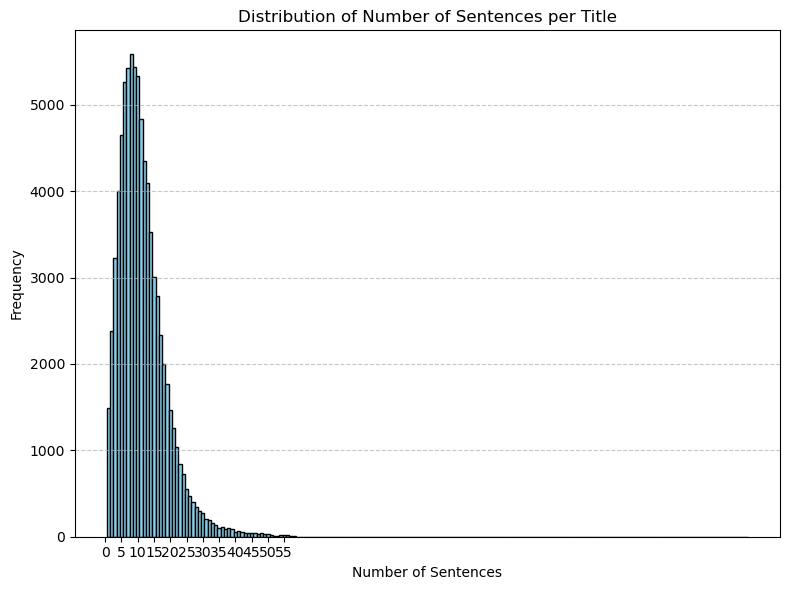

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# length 열의 분포 시각화
plt.figure(figsize=(8, 6))
plt.hist(df_sorted[200:]['length'], bins=range(1, df_sorted[20:]['length'].max() + 2), align='left', color='skyblue', edgecolor='black')
plt.title('Distribution of Number of Sentences per Title')
plt.xlabel('Number of Sentences')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, df_sorted[200:]['length'].max() + 1, 5))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 거의 5~25 문장

In [11]:
# 많이 등장한 단어 분석

from collections import Counter
import re

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

# 모든 문장을 하나의 텍스트로 결합
all_text = " ".join(df['Sentence'])

# 텍스트를 소문자로 변환하고, 단어별로 분할
words = re.findall(r'\b\w+\b', all_text.lower())

# 단어의 빈도 계산
word_freq = Counter(words)

# 불용어를 제외하고 단어의 빈도 계산
filtered_words = [word for word in words if word not in stop_words]
filtered_word_freq = Counter(filtered_words)

# 불용어를 제외한 가장 흔한 10개 단어 추출
filtered_common_words = filtered_word_freq.most_common(10)
filtered_common_words

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gmleh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('said', 131665),
 ('year', 95570),
 ('billion', 88327),
 ('u', 84314),
 ('1', 83058),
 ('million', 78614),
 ('2', 66295),
 ('mr', 66127),
 ('new', 60204),
 ('company', 57477)]

C:\Users\gmleh\AppData\Local\Temp\ipykernel_18740\2407896014.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Word_Count'] = df['Sentence'].apply(lambda x: len(x.split()))


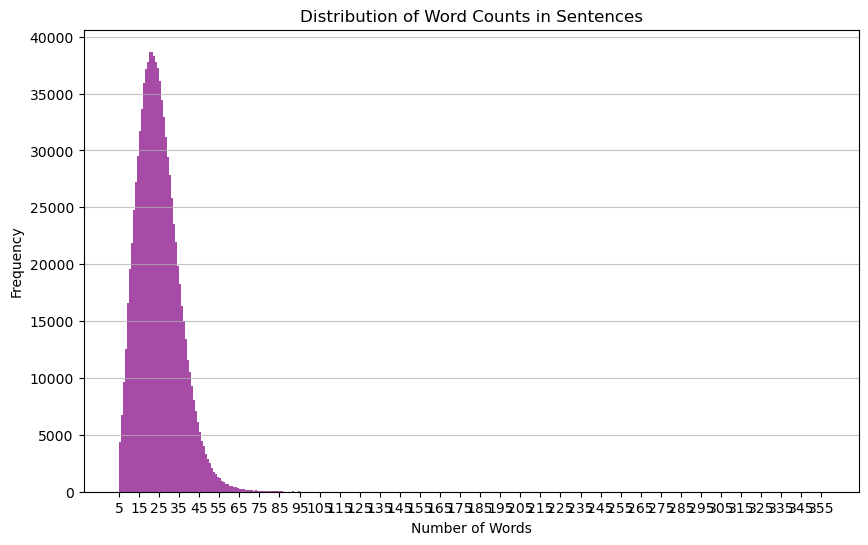

In [12]:
# 전체 문서의 단어 수 분포 시각화

import matplotlib.pyplot as plt

df['Word_Count'] = df['Sentence'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
plt.hist(df['Word_Count'], bins=range(min(df['Word_Count']), max(df['Word_Count']) + 1), color='purple', alpha=0.7)
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Word Counts in Sentences')
plt.xticks(range(min(df['Word_Count']), max(df['Word_Count']) + 1, 10))
plt.grid(axis='y', alpha=0.75)
plt.show()


In [13]:
# 단어 수 60 이상인 문장, 문서 내 문장 수가 50 이상인 문서 제거

df = df[df['Word_Count'] < 60]
df = df[df['length'] < 50]
df

,Title,Original_Text,Sentence,length,Word_Count
0,Yes Bonds Could Still Rally Even With Yields B...,Bond Yields Hit Record Lows is a headline tha...,first the 30year bond yield fell past 2% then ...,23,20
1,Yes Bonds Could Still Rally Even With Yields B...,Bond Yields Hit Record Lows is a headline tha...,a few market veterans also recall bondmarket r...,23,22
2,Yes Bonds Could Still Rally Even With Yields B...,Bond Yields Hit Record Lows is a headline tha...,and even fewer stuck their necks out then to d...,23,29
3,Yes Bonds Could Still Rally Even With Yields B...,Bond Yields Hit Record Lows is a headline tha...,today some of these early and prescient bond b...,23,53
4,Yes Bonds Could Still Rally Even With Yields B...,Bond Yields Hit Record Lows is a headline tha...,i never bought bonds for yield he said.,23,8
...,...,...,...,...,...
1007741,Poised to Leave Bankruptcy iHeartMedia Files f...,iHeartMedia Inc. the nations largest radio bro...,the nations largest radio broadcaster said wed...,5,37
1007742,Poised to Leave Bankruptcy iHeartMedia Files f...,iHeartMedia Inc. the nations largest radio bro...,the company with 848 radio stations intends to...,5,22
1007743,Poised to Leave Bankruptcy iHeartMedia Files f...,iHeartMedia Inc. the nations largest radio bro...,the company could increase the offering size d...,5,20
1007744,Poised to Leave Bankruptcy iHeartMedia Files f...,iHeartMedia Inc. the nations largest radio bro...,the company has said it expects to exit from b...,5,13


In [14]:
word_count_statistics = df['Word_Count'].describe()
word_count_statistics

count    914086.000000
mean         24.126337
std           9.994406
min           5.000000
25%          17.000000
50%          23.000000
75%          30.000000
max          59.000000
Name: Word_Count, dtype: float64

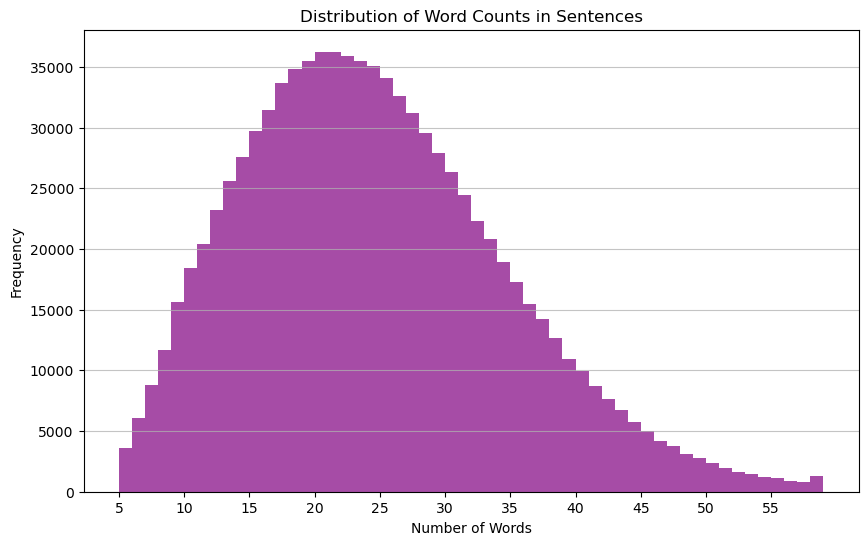

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(df['Word_Count'], bins=range(min(df['Word_Count']), max(df['Word_Count']) + 1), color='purple', alpha=0.7)
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.title('Distribution of Word Counts in Sentences')
plt.xticks(range(min(df['Word_Count']), max(df['Word_Count']) + 1, 5))
plt.grid(axis='y', alpha=0.75)
plt.show()

In [16]:
df['Word_Count'].describe()

count    914086.000000
mean         24.126337
std           9.994406
min           5.000000
25%          17.000000
50%          23.000000
75%          30.000000
max          59.000000
Name: Word_Count, dtype: float64

In [17]:
# 사용하는 총 토큰 수 구하기

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

df['Token'] = df['Sentence'].apply(lambda x: len(tokenizer.tokenize(x)))

total_tokens = df['Token'].sum()

print(total_tokens)

27072827


In [40]:
# 필요없는 열 삭제

filtered_df = df[['Sentence']]
filtered_df

# 10만개 문장만 사용

sampled_df = filtered_df.sample(n=100000, random_state=1, ignore_index=True)

In [41]:
sampled_df

,Sentence
0,the eddc is planning $150 million of opportuni...
1,the reports come 45 days after the close of th...
2,money used for buybacks should be used to redu...
3,if the past few years are anything to go by th...
4,the same organization also published a survey ...
...,...
79995,the aftermath of george floyds death in minnea...
79996,last month amd became the topperforming stock ...
79997,lenschow maintained his overweight rating and ...
79998,laura burke a 22yearold emergency medical tech...


In [24]:
# csv 저장

# sampled_df.to_csv('df_further_filtered_100000.csv')

In [42]:
# txt 저장

sampled_df.to_csv('df_further_filtered_100000.txt', sep='\n', header=False, index=False)